![](https://i.imgur.com/JsMvGnP.png)


## Exercício de análise exploratória de dados

Neste projeto você irá realizar uma análise estatística de um dos dataset mais famosos da comunidade de Data Science, o dataset **Titanic**.

Esse dataset contém dados de 891 passageiros do Titanic. A análise vai ser guiada pelas perguntas apresentadas a seguir.

O dataset disponibilizado tem quase a mesma estrutura de uma planilha do excel, com linhas e colunas. O tipo do arquivo é o CSV ou Comma-separated values, que seriam Valores Separados por Vírgula, porque é exatamente assim que ele funciona, você distingue que o valor pertence a diferentes colunas porque a vírgula está ali separando uns dos outros.

O objetivo deste projeto é você aplicar os principais conceitos que você aprendeu na unidade 6.
Todo o projeto deve ser executado neste Jupyter Notebook. Por fim, se desejar, revise as respostas com o seu mentor.

### Descrição dos dados

O dataset possui 891 registros (linhas) e 12 atributos (colunas).

Abaixo estão as descrições das colunas do nosso Dataset:

* passengerid = ID do passageiro do navio (código primário).
* survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não sobreviveu.
* pclass = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe.
* name = Nome do passageiro
* sex = Gênero do passageiro, sendo masculino e feminino.
* age = Idade do passageiro na data da ocorrência do naufrágio.
* sibsp = Número de irmãos / cônjuges a bordo.
* parch = Número de pais / filhos a bordo.
* ticket = Código do ticket.
* fare = Valor da passagem.
* cabin = Código de identificação da Cabine.
* embarked = Local ondem o passageiro embarcou no navio.

### Carregando os dados

In [1]:
import pandas as pd

# Carregando os dados
# O arquivo “titanic.csv” deve estar salvo na mesma pasta do seu código Python
dados = pd.read_csv("titanic.csv")

# Exibe o número de linhas e colunas
print(dados.shape)

# Exibe as 10 primeiras linhas
dados.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. Qual foi a porcentagem dos passageiros sobreviventes?

Dica: use a função value_counts() do pandas com o parâmetro _normalize_

In [22]:
print(f"Não sobbreviveram: {round(dados['Survived'].value_counts(normalize=True),3)[0]}%")
print(f"Sobreviveram: {round(dados['Survived'].value_counts(normalize=True),3)[1]}%") 

Não sobbreviveram: 0.616%
Sobreviveram: 0.384%


### 2. Qual era a faixa etária dos passageiros que estavam no Titanic?

In [28]:
print(f"A faixa etária varia de {dados['Age'].min()} a {dados['Age'].max()} anos")

A faixa etária varia de 0.42 a 80.0 anos


### 3. Qual porcentagem de homens e mulheres sobreviventes?

In [41]:
sexo_sobreviventes =dados[dados['Survived'] == 1]['Sex'].value_counts(normalize=True)
# por que a porcentagem deu diferente do gabarito?

In [47]:
print(f'Mulheres: {round(sexo_sobreviventes[0],3)}\nHomens: {round(sexo_sobreviventes[1],3)}')

Mulheres: 0.681
Homens: 0.319


Mulheres:  0.7420382165605095
Homens:  0.18890814558058924


### 4. Quais os tipos de variáveis nas colunas survived, pclass, name, sex e age?

[Dica ...](# Referência: http://professorguru.com.br/estatistica/introdu%C3%A7%C3%A3o%20%C3%A0%20estat%C3%ADstica/tipos%20de%20vari%C3%A1veis%20estat%C3%ADsticas.html)

In [56]:
for coluna in ['Survived','Pclass','Name','Sex','Age']:
    print(f'Tipo de dado da coluna {coluna}: {dados[coluna].dtype}')

Tipo de dado da coluna Survived: int64
Tipo de dado da coluna Pclass: int64
Tipo de dado da coluna Name: object
Tipo de dado da coluna Sex: object
Tipo de dado da coluna Age: float64


### 5. Qual o tipo de classe de passagem mais frequente nos dados?

In [60]:
dados['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### 6. Qual a média e desvio padrão do valor das passagens?

In [70]:
print(f"Media:{round(dados['Fare'].mean(),3)}\nDesvio Padrão:{round(dados['Fare'].std(),3)}")

Media:32.204
Desvio Padrão:49.693


### 7. Existem outliers na coluna age? Quais? Crie um boxplot para esse atributo.

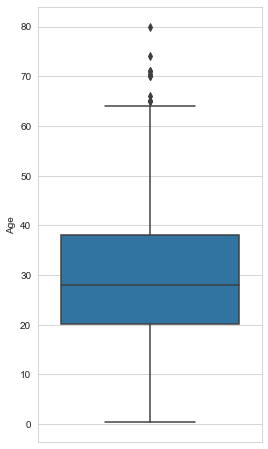

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,8))
sns.set_style('whitegrid')
sns.boxplot(dados['Age'], orient='v')

plt.show()

### 8. Cria um histograma para os atributos age, pclass e fare. Quais informações você pode extrair desses gráficos?


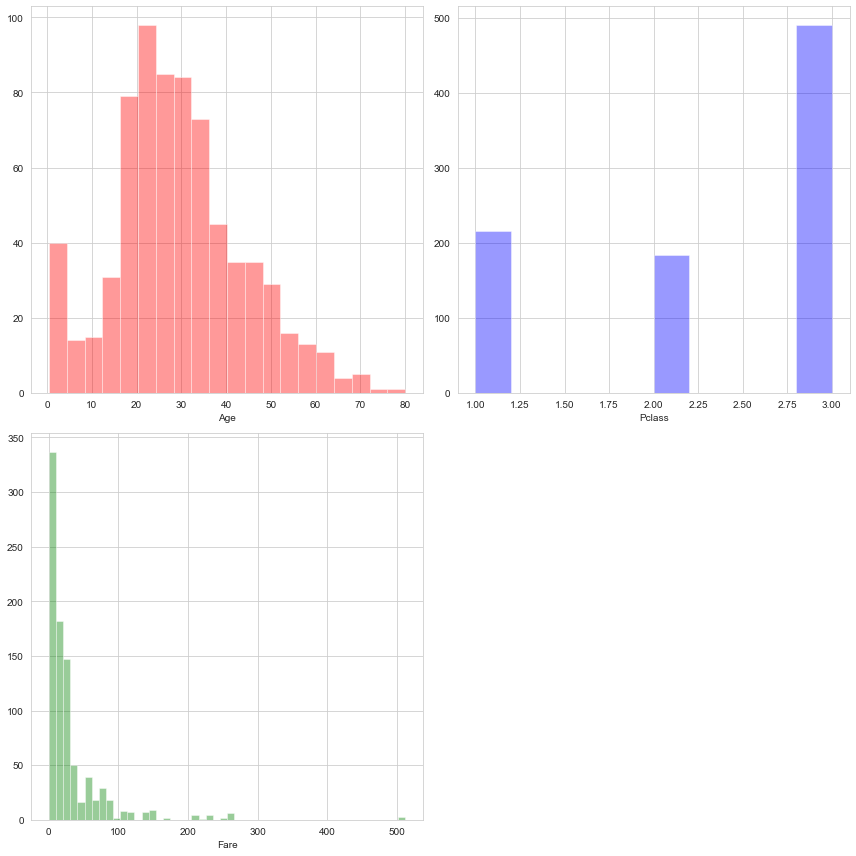

In [131]:
fig = plt.figure(figsize=(12,12))

plt.subplot(2, 2, 1)
sns.distplot(dados['Age'].dropna(), kde=False,color='red')

plt.subplot(2, 2, 2)
sns.distplot(dados['Pclass'].dropna(), kde=False,color='blue')

plt.subplot(2, 2, 3)
sns.distplot(dados['Fare'].dropna(), kde=False, color='green')

plt.tight_layout()
plt.show()